# Capítulo 8 - Detecção de anomalias

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_excel('datasets/Sample - Superstore.xls')
dados.columns = ['id_registro', 'id_pedido', 'data_pedido', 'data_envio', 'modo_envio', 'id_cliente', 'nome_cliente', 
                 'segmento', 'pais', 'cidade', 'estado', 'codigo_postal', 'regiao', 'id_produto', 'categoria', 'subcategoria', 
                 'nome_produto', 'vendas', 'quantidade', 'desconto', 'lucro']

print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.sample()

Linhas: 9994 | Colunas: 21


,id_registro,id_pedido,data_pedido,data_envio,modo_envio,id_cliente,nome_cliente,segmento,pais,cidade,...,codigo_postal,regiao,id_produto,categoria,subcategoria,nome_produto,vendas,quantidade,desconto,lucro
1099,1100,CA-2016-107216,2016-06-14,2016-06-17,First Class,PV-18985,Paul Van Hugh,Home Office,United States,San Francisco,...,94122,West,FUR-FU-10000206,Furniture,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",8.73,3,0.0,4.1031


## Informação dos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_registro    9994 non-null   int64         
 1   id_pedido      9994 non-null   object        
 2   data_pedido    9994 non-null   datetime64[ns]
 3   data_envio     9994 non-null   datetime64[ns]
 4   modo_envio     9994 non-null   object        
 5   id_cliente     9994 non-null   object        
 6   nome_cliente   9994 non-null   object        
 7   segmento       9994 non-null   object        
 8   pais           9994 non-null   object        
 9   cidade         9994 non-null   object        
 10  estado         9994 non-null   object        
 11  codigo_postal  9994 non-null   int64         
 12  regiao         9994 non-null   object        
 13  id_produto     9994 non-null   object        
 14  categoria      9994 non-null   object        
 15  subcategoria   9994 n

## Descrição dos dados

In [4]:
dados.drop(['id_registro', 'codigo_postal'], axis=1).describe().round(2)

,vendas,quantidade,desconto,lucro
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


## Detecção univariada de anomalias

### Distribuição de vendas

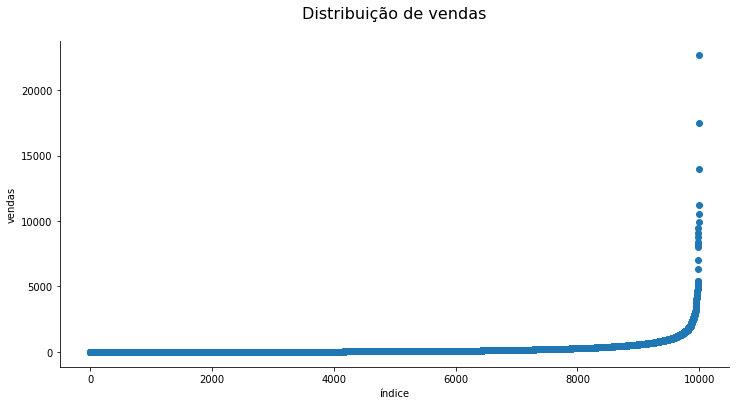

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(range(dados.shape[0]), np.sort(dados['vendas'].values))
plt.xlabel('índice')
plt.ylabel('vendas')
plt.title('Distribuição de vendas', y=1.05, fontsize=16)
sns.despine()

Assimetria: 12.972752
Curtose: 305.311753


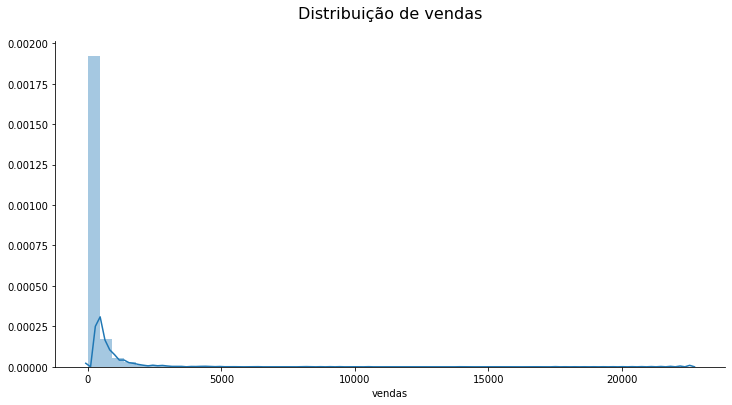

In [6]:
print("Assimetria: %f" % dados['vendas'].skew())
print('Curtose: %f' % dados['vendas'].kurt())

plt.figure(figsize=(12, 6))
sns.distplot(dados['vendas'])
plt.title('Distribuição de vendas', y=1.05, fontsize=16)
sns.despine()

### Boxplot das vendas

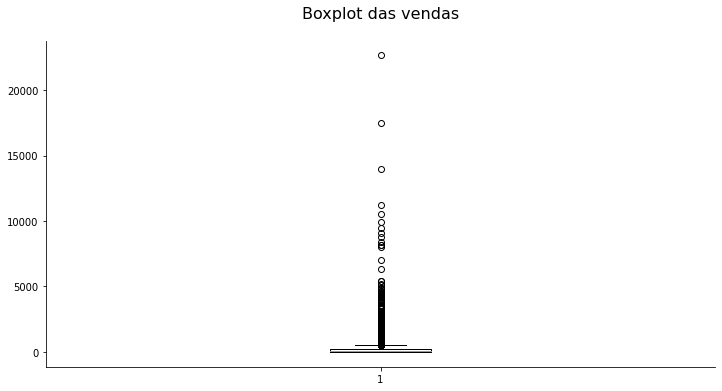

In [7]:
plt.figure(figsize=(12, 6))
plt.boxplot(dados['vendas'])
plt.title('Boxplot das vendas', y=1.05, fontsize=16)
sns.despine()

### Distribuição dos lucros

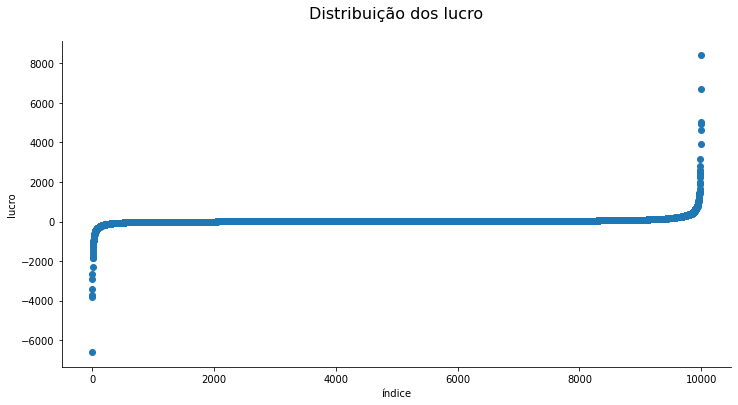

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(range(dados.shape[0]), np.sort(dados['lucro'].values))
plt.xlabel('índice')
plt.ylabel('lucro')
plt.title('Distribuição dos lucro', y=1.05, fontsize=16)
sns.despine()

Assimetria: 7.561432
Curtose: 397.188515


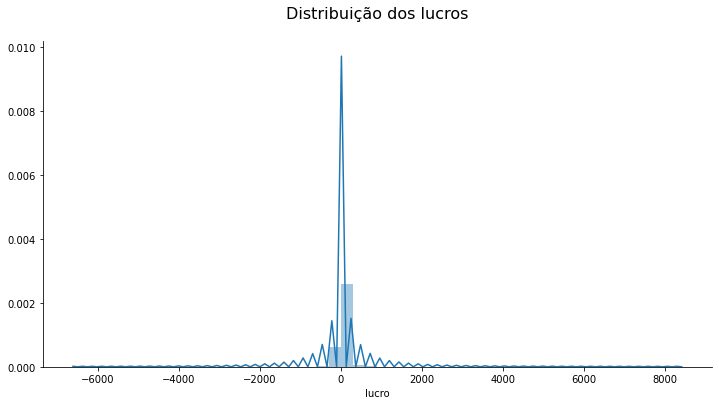

In [9]:
print("Assimetria: %f" % dados['lucro'].skew())
print('Curtose: %f' % dados['lucro'].kurt())

plt.figure(figsize=(12, 6))
sns.distplot(dados['lucro'])
plt.title('Distribuição dos lucros', y=1.05, fontsize=16)
sns.despine()

### Boxplot dos lucros

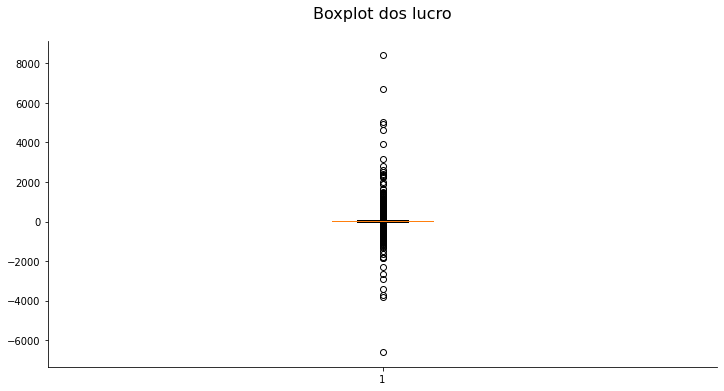

In [10]:
plt.figure(figsize=(12, 6))
plt.boxplot(dados['lucro'])
plt.title('Boxplot dos lucro', y=1.05, fontsize=16)
sns.despine()

### Detecção univariada de anomalias

In [11]:
from sklearn.ensemble import IsolationForest

def univariateAnomalyDetection(column):
    """
        - Treina IsolationForest usando os dados de venda
        - Armazena as vendas em um array NumPy
        - Calcula a pontuação da anomalia para cada observação
        - Classificou cada observação como outlier ou não outlier
        - A visualização destaca as regiões onde caem os outliers
    """
    
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(dados[column].values.reshape(-1, 1))
    xx = np.linspace(dados[column].min(), dados[column].max(), len(dados)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    plt.figure(figsize=(12, 6))
    plt.plot(xx, anomaly_score, label='pontuação de anomalia')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.4, 
                     label='região de outliers')
    plt.legend()
    plt.ylabel('pontuação de anomalia')
    plt.xlabel(column)
    plt.show()

#### Vendas
> Parece que as vendas que excedem 1000 seriam consideradas como outlier

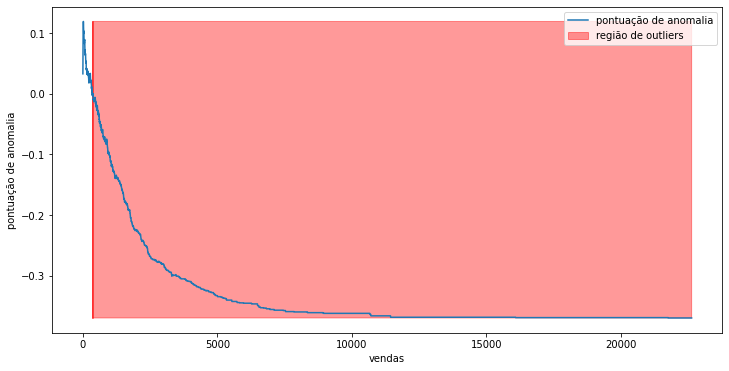

In [12]:
univariateAnomalyDetection('vendas')

#### Lucros

> Parece que o lucro abaixo de -100 ou superior a 100 seria considerado um valor atípico

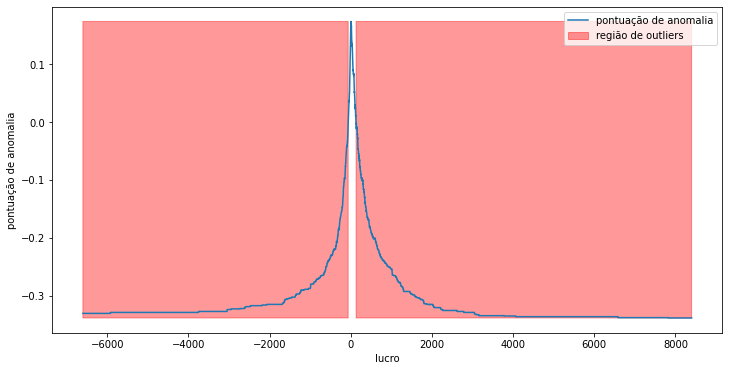

In [13]:
univariateAnomalyDetection('lucro')

## Detecção multivariada de anomalias

### Correlação entre vendas e lucros

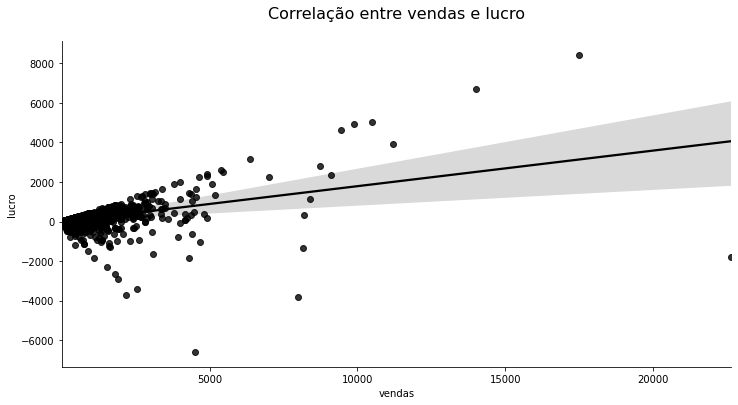

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Correlação entre vendas e lucro', y=1.05, fontsize=16)
sns.regplot(x='vendas', y='lucro', data=dados, color='k') 
sns.despine ()

### Análise multivariada

In [15]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile
import matplotlib

In [16]:
def analiseMultivariada(clf, dados, title):
    """
        Define, arbitrariamente, a fração de outliers como 1%
        Ajusta os dados ao modelo CBLOF e prevê os resultados
        Usa o valor limite para considerar que um ponto de dados é inlier ou outlier
        Usa a função de decisão para calcular a pontuação de anomalia para cada ponto    
    """
    
    outliers_fraction = 0.01
    xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

    scores_pred = clf.decision_function(X) * -1
    y_pred = clf.predict(X)

    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    df1 = dados
    df1['outlier'] = y_pred.tolist()

    inliers_sales = np.array(df1['vendas'][df1['outlier'] == 0]).reshape(-1,1)
    inliers_profit = np.array(df1['lucro'][df1['outlier'] == 0]).reshape(-1,1)

    outliers_sales = df1['vendas'][df1['outlier'] == 1].values.reshape(-1,1)
    outliers_profit = df1['lucro'][df1['outlier'] == 1].values.reshape(-1,1)

    print('OUTLIERS:', n_outliers, 'INLIERS:', n_inliers)
    threshold = percentile(scores_pred, 100 * outliers_fraction)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')    
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
    plt.axis('tight')   
    plt.legend([a.collections[0], b,c], ['função de decisão aprendida', 'inliers','outliers'], prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(title, y=1.05, fontsize=14)
    plt.show()

Escalona vendas e lucro entre 0 e 1:

In [17]:
minmax = MinMaxScaler(feature_range=(0, 1))
dados[['vendas', 'lucro']] = minmax.fit_transform(dados[['vendas', 'lucro']])
dados[['vendas', 'lucro']].head()

,vendas,lucro
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


In [18]:
X1 = dados['vendas'].values.reshape(-1,1)
X2 = dados['lucro'].values.reshape(-1,1)
X = np.concatenate((X1, X2),axis=1)

#### Fator Atípico Local Baseado em Cluster (CBLOF)

OUTLIERS: 100 INLIERS: 9894


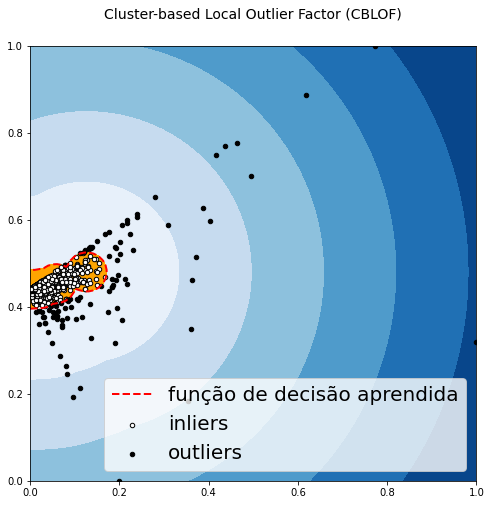

In [19]:
cblof = CBLOF(contamination=0.01, check_estimator=False, random_state=0)
cblof.fit(X)
analiseMultivariada(cblof, dados, 'Cluster-based Local Outlier Factor (CBLOF)')

#### Detecção de outlier baseada em histograma (HBOS)

OUTLIERS: 90 INLIERS: 9904


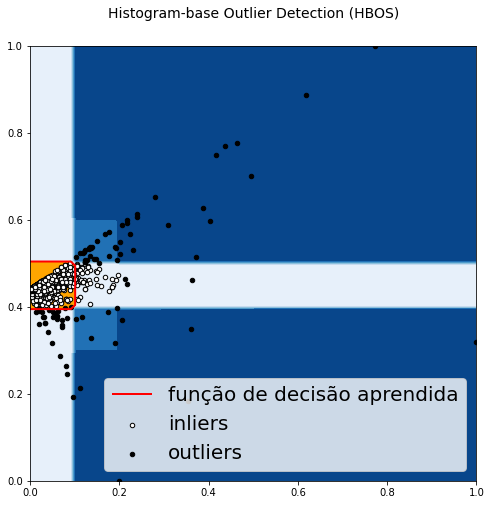

In [20]:
hbos = HBOS(contamination=0.01)
hbos.fit(X)
analiseMultivariada(hbos, dados, 'Histogram-base Outlier Detection (HBOS)')

#### Floresta de Isolamento

OUTLIERS: 100 INLIERS: 9894


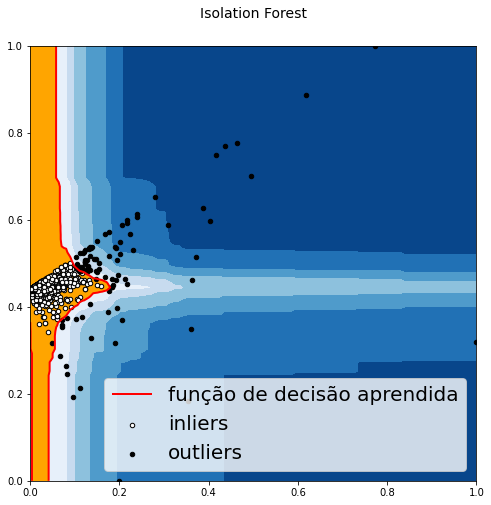

In [21]:
iforest = IForest(contamination=0.01,random_state=0)
iforest.fit(X)
analiseMultivariada(iforest, dados, 'Isolation Forest')

#### K - Vizinhos mais próximos (KNN)

OUTLIERS: 91 INLIERS: 9903


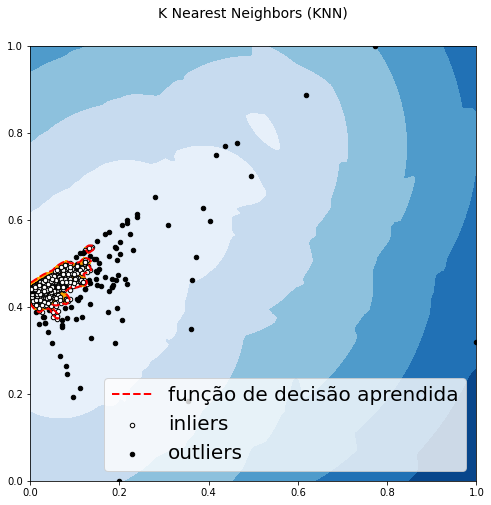

In [22]:
knn = KNN(contamination=0.01)
knn.fit(X)
analiseMultivariada(knn, dados, 'K Nearest Neighbors (KNN)')